In [16]:
import numpy as np 
import matplotlib.pyplot as plt


# Direct and inverse power iteration

We consider now $A$ a $n \times n$ matrix over $\mathbb{C}$ and $y_0 \in \mathbb{C}^n$ as a starting vector. We define the iteration:

$$y_{k+1} = Ay_k \Leftrightarrow y_k = A^k y_0$$

**Rayleigh quotient:**

We call $\frac{y^* A y}{y^* y}$ the Rayleigh quotient of $A$ at point $y$.

**Theorem:** Let $A$ be diagonalizable with eigenvalues $\lambda_1,...\lambda_n$ such that $|\lambda_1| > ... > |\lambda_n| >0$. 

+ The vector $y_k$ can be written as $y_k = \lambda_1^k(a_1v_1 + O(\frac{|\lambda_2|}{|\lambda_1|}^k))$ where $v_1$ is the eigenvector corresponding to $\lambda_1$ and $a_1 = \frac{y_0^* v_1}{v_1^* v_1} \neq 0$. This means that $\lambda_1^{-k} y_k$ converges to a eigenvector of $A$
+ If $a_1 \neq 0$ the Rayleigh quotient $\frac{y_k^* A y_k}{y_k^* y_k}$ converges to $\lambda_1$ with rate $O(\frac{|\lambda_2|}{|\lambda_1|}^{k})$
+ If $A$ is normal the convergence rate of the Rayleigh quotient is even $O(\frac{|\lambda_2|}{|\lambda_1|}^{2k})$


**Remark** For $|\lambda_1| > 1$ the vector $y_k$ of the iteration is growing. In order to avoid this we normalize the vector in each step $y_k \to \frac{y_k}{||y_k||_2}$


Largest eigenvalue: 3.414213562373094
Corresponding eigenvector: [7.93147313e-06 1.12167968e-05 7.93147313e-06]


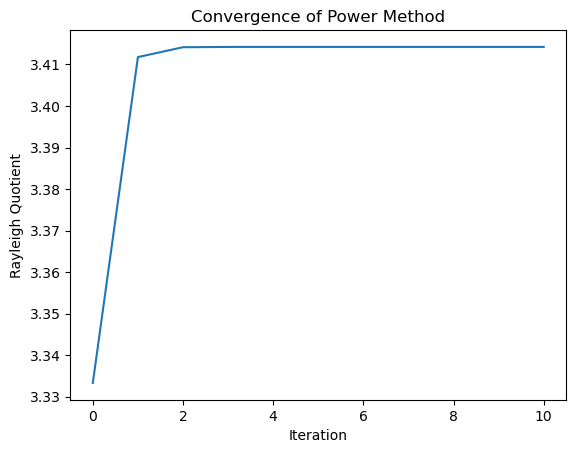

In [17]:
def power_method(A,y0,max_iter = 100, tol=1e-8):
    """ 
    Implementation of the power method to find the largest eigenvalue and eigenvector of matrix A
    """
    # Normalize starting vector
    y0 = y0 / np.linalg.norm(y0)
    y = y0
    lambda_ls = []
    lambda_ls.append(y.T @ A @ y) # Initial Rayleigh quotient

    for i in range(max_iter):
        y_k = A @ y
        y_k = y_k / np.linalg.norm(y_k)
        # Check for convergence
        if np.linalg.norm(y_k - y) < tol:
            break
        # Compute Rayleight quotient
        lambda_1 = y_k.T @ A @ y_k
        lambda_ls.append(lambda_1)
        eig_1 = lambda_1**(-i) * y_k
        y = y_k
    return lambda_1, eig_1, lambda_ls

A = np.array([[2,1,0],[1 ,2,1],[0,1,2]])
y0 = np.array([1,1,1])
lambda_1, eig_1, lambda_ls = power_method(A,y0)
print("Largest eigenvalue:", lambda_1)
print("Corresponding eigenvector:", eig_1)
plt.plot(lambda_ls)
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Quotient")
plt.title("Convergence of Power Method")
plt.show()

Numpy largest eigenvalue: 100.20523584212827
Largest eigenvalue: 100.20523584212837
Corresponding eigenvector: [1.06524873e-13 9.89983854e-14 9.57892958e-14 1.00530883e-13
 9.22289263e-14 1.05330130e-13 1.04654224e-13 9.26398334e-14
 9.71314720e-14 9.69551535e-14 1.02607025e-13 9.80591249e-14
 9.88483234e-14 8.66737728e-14 9.56196077e-14 9.68649923e-14
 9.68850556e-14 9.90763542e-14 9.45439405e-14 1.03840466e-13
 1.00758614e-13 9.08806815e-14 9.98746258e-14 9.34000273e-14
 1.01933663e-13 1.02628229e-13 1.00197522e-13 9.43366169e-14
 1.07729133e-13 9.27102639e-14 1.04200312e-13 1.01888052e-13
 1.00032236e-13 9.65163940e-14 9.71140957e-14 9.19202474e-14
 9.86100623e-14 1.00655770e-13 1.03189244e-13 9.83884260e-14
 1.01198940e-13 9.52464816e-14 9.81117481e-14 9.04990226e-14
 1.04063624e-13 9.31669039e-14 1.02939718e-13 9.54643927e-14
 9.71958696e-14 1.05467593e-13 9.34822565e-14 9.71250706e-14
 1.00669374e-13 1.04403766e-13 9.70573925e-14 1.02624123e-13
 9.27742299e-14 9.66402889e-14 9.80

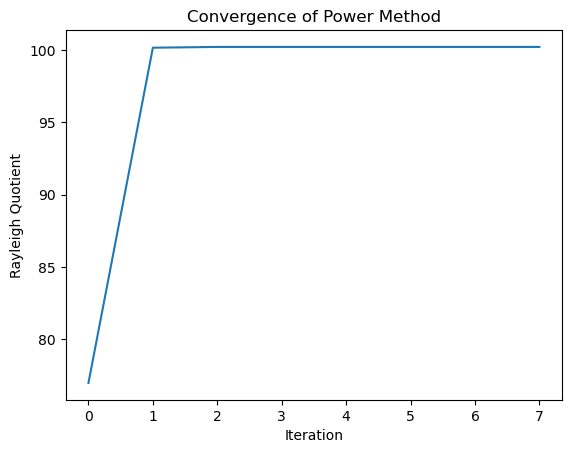

In [18]:
# Test on some bigger matrices

A = np.random.rand(100,100)
A = A + A.T # Make it symmetric
y0 = np.random.rand(100)
lambda_1, eig_1, lambda_ls = power_method(A,y0)
numpy_eigvals, numpy_eigvecs = np.linalg.eig(A)
print("Numpy largest eigenvalue:", np.max(numpy_eigvals))
print("Largest eigenvalue:", lambda_1)
print("Corresponding eigenvector:", eig_1)
plt.plot(lambda_ls)
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Quotient")
plt.title("Convergence of Power Method")
plt.show()

Problem of this method is if $|\lambda_2/\lambda_1|$ is close to 1 then the convergence is really slow. For this one can use the inverse power iteration.

## Inverse power iteration

Given we know an approximation $\mu$ of an eigenvalue of $A$ we now that $|\mu - \lambda_1| << |\mu - \lambda_j$ this means

$$\frac{1}{|\mu - \lambda_1|} >> \frac{1}{|\mu - \lambda_j|}$$

Now $(\mu - \lambda_i)^{-1}$ are the eigenvalues of $(A - \mu I)^{-1}$. This means we can apply the power iteration to $(A - \mu I)^{-1}$ to find the eigenvalue $\frac{1}{\mu - \lambda_1}$ and therefore $\lambda_1$.

$$y_{k+1} = (A - \mu I)^{-1} y_k$$


Eigenvalue closest to mu: 3.4142135623730954
Corresponding eigenvector: [0.04289322 0.06066017 0.04289322]


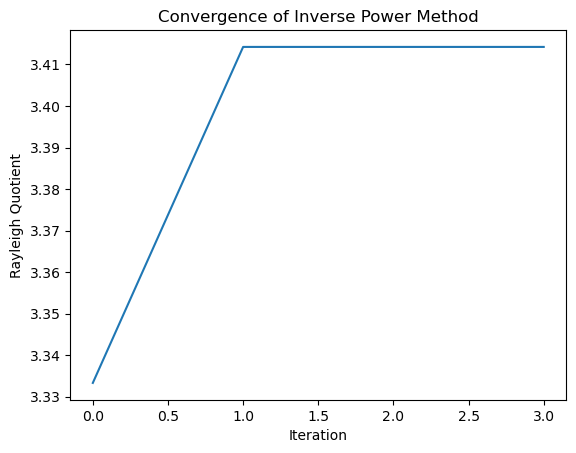

In [19]:
def inverse_power_method(A,y0,mu,max_iter = 100, tol=1e-8):
    """ 
    Implementation of the inverse power method
    """
    # Normalize starting vector
    y0 = y0 / np.linalg.norm(y0)
    y = y0
    lambda_ls = []
    lambda_ls.append(y.T @ A @ y) # Initial Rayleigh quotient
     
    # Compute Inverse of (A - mu*I)
    Inv = np.linalg.inv(A - mu * np.eye(A.shape[0]))
    for i in range(max_iter):
        y_k = Inv @ y
        y_k = y_k / np.linalg.norm(y_k)
        # Check for convergence
        if np.linalg.norm(y_k - y) < tol:
            break
        # Compute Rayleight quotient
        lambda_1 = y_k.T @ A @ y_k
        lambda_ls.append(lambda_1)
        eig_1 = lambda_1**(-i) * y_k
        y = y_k
    return lambda_1, eig_1, lambda_ls

A = np.array([[2,1,0],[1 ,2,1],[0,1,2]])
y0 = np.array([1,1,1])
mu = 3.41
lambda_1, eig_1, lambda_ls = inverse_power_method(A,y0,mu)
print("Eigenvalue closest to mu:", lambda_1)
print("Corresponding eigenvector:", eig_1)
plt.plot(lambda_ls)
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Quotient")
plt.title("Convergence of Inverse Power Method")
plt.show()
        

Numpy eigenvalue closest to mu: 499.8374507637891
Eigenvalue closest to mu: 499.83745076378915


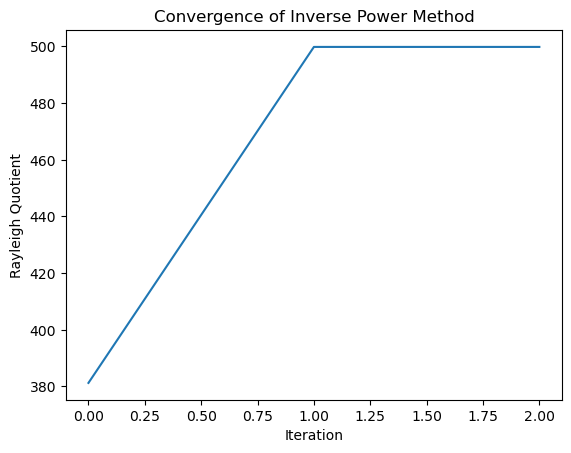

In [20]:
# Convergence Test
A = np.random.rand(500,500)
A = A + A.T # Make it symmetric
np_eigvals, np_eigvecs = np.linalg.eig(A)
y0 = np.random.rand(500)
lambda_max = np.max(np_eigvals)
mu = lambda_max - 0.05 # Shift close to largest eigenvalue
lambda_1, eig_1, lambda_ls = inverse_power_method(A,y0,mu)
print("Numpy eigenvalue closest to mu:", np_eigvals[np.argmin(np.abs(np_eigvals - mu))])
print("Eigenvalue closest to mu:", lambda_1)
plt.plot(lambda_ls)
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Quotient")
plt.title("Convergence of Inverse Power Method")
plt.show()

# Transformation to Hessenberg Form

> A Hessenberg matrix is a square matrix for which all entries below the first subdiagonal are zero.

We can use the Householder Reflections to tansform into the Hessenberg Form:

Let $A$ be a real or complex $n \times n$ matrix, let $A'$ be the $(n-1) \times n$ submatrix of $A$ constructed by removing the first row of $A$ and $a_1'$ be the first column. We construct the $(n-1) \times (n-1)$ Householder matrix $V_1 = I_{n-1} - 2 \frac{ww^*}{||w||^2}$ where 

$$w = \begin{cases} ||a_1'||_2 e_1 - a_1', if a_{11}' = 0 \\ ||a_1'||_2 e_1 + \frac{a_{11}'}{|a_{11}'|} a_1', else \end{cases}$$

The block matrix $U_1 = \begin{pmatrix} 1 & 0 \\ 0 & V_1 \end{pmatrix}$ is unitary and will map $A$ to $U_1A$ which has only zeors below the second netry of the first colum. Now we repeat this process for the submatrix and construct a $(n-2) \times (n-2)$ Householder matrix $V_2$ and consider $A''$ which is constructed by removing the first row and first column of $A'$

In [ ]:
def hessenberg_householder(A):
    n = A.shape[0]

    if n != A.shape[1]:
        raise ValueError("Matrix must be square")

    H = A.copy()
    Q = np.eye(n)

    for k in range(n-2):
        # Extract first subcolumn below the diagonal
        x = H[k+1:, k]

        if np.linalg.norm(x[1:]) < 1e-10:
            continue # Already zero

        # Construct the Householder vector
        e1 = np.zeros_like(x)
        e1[0] = 1

        if x[0] == 0: # First case
            w = np.linalg.norm(x) * e1 - x
        else: # Second case
            w = np.linalg.norm(x) * e1 + (x[0] / abs(x[0])) * x

        w = w / np.linalg.norm(w) # Normalize

        # Construct Householder matrix for subblock
        V = np.eye(len(x)) - 2 * np.outer(w, w)

        H[k+1:, k:] = V @ H[k+1:, k:] # Apply from the left
        H[:, k+1:] = H[:, k+1:] @ V.T # Apply from the right

        Q[:,k+1:] = Q[:,k+1:] @ V.T # Update Q

    # Ensure the result is properly Hessenberg
    for i in range(n):
        for j in range(i-1):
            if abs(H[i,j]) > 1e-10:
                H[i,j] = 0.0
    return H, Q


A = np.array([[3,2,1],[2,1,3],[1,3,1]])
# Compute Eigenvalues
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues from numpy:")
print(eigvals)

H, Q = hessenberg_householder(A)
eigvals_H, eigvecs_H = np.linalg.eig(H)
print("Eigenvalues from Hessenberg form:")
print(eigvals_H)

print("Hessenberg form of A:")
print(H)
print("Orthogonal matrix Q:")
print(Q)

Eigenvalues from numpy:
[ 5.70468284  1.40951907 -2.11420191]
Eigenvalues from Hessenberg form:
[ 5.10043199  1.33887969 -0.43931167]
Hessenberg form of A:
[[ 3 -2  0]
 [-2  3 -1]
 [ 0 -1  0]]
Orthogonal matrix Q:
[[ 1.          0.          0.        ]
 [ 0.         -0.89442719 -0.4472136 ]
 [ 0.         -0.4472136   0.89442719]]


# QR Algorithm

The QR algorithm is an iterative method to compute all eigenvalues of a matrix $A \in \mathbb{R}^{n \times n}$.

**Algorithm**

1. Set $T_0 = A$
2. For $k = 0,1,2,...$ until convergence do:
   1. Compute the QR decomposition $T_k = Q_k R_k$
   2. Set $T_{k+1} = R_k Q_k$

**Theorem** For a $n \times n$ matrix $A$ with eigenvalues $|\lambda_1| > ... > |\lambda_n| > 0$ and $T_k$ defined by the QR algorithm one gets Permutations $\sigma \in S_n$ and Phase-matrices

$\Phi_k = diag(e^{i \theta_1^k},...,e^{i \theta_n^k})$ with $\theta_j^k \in [0,2\pi)$ such that $\lim_{k \to \infty} \Phi_k^* T_k \Phi_k = diag(\lambda_{\sigma(1)},...,\lambda_{\sigma(n)})$

which basically means that $T_k$ converges to an upper triangular matrix with the eigenvalues of $A$ on the diagonal.

Eigenvalues from QR algorithm: [3.41421356 2.         0.58578644]
Eigenvalues from numpy: [3.41421356 2.         0.58578644]


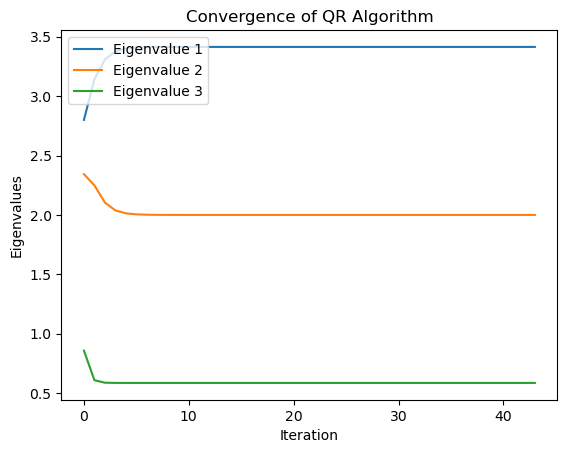

In [ ]:
def qr_algorithm(A,max_iter = 100, tol=1e-10):
    """ 
    Implementation of the QR algorithm to find all eigenvalues of matrix A
    """
    T_k = A.copy()
    eigvals_ls = []
    for i in range(max_iter):
        Q,R = np.linalg.qr(T_k)
        T_k = R @ Q
        # Check for convergence
        off_diag = T_k - np.diag(np.diag(T_k))
        if np.linalg.norm(off_diag, ord='fro') < tol:
            break
        eigvals_ls.append(np.diag(T_k))
    return np.diag(T_k), eigvals_ls

A = np.array([[2,1,0],[1 ,2,1],[0,1,2]])
eigvals, eigvals_ls = qr_algorithm(A)
print("Eigenvalues from QR algorithm:", eigvals)
numpy_eigvals, numpy_eigvecs = np.linalg.eig(A)
print("Eigenvalues from numpy:", numpy_eigvals)
plt.plot([eig[0] for eig in eigvals_ls], label='Eigenvalue 1')
plt.plot([eig[1] for eig in eigvals_ls], label='Eigenvalue 2')
plt.plot([eig[2] for eig in eigvals_ls], label='Eigenvalue 3')
plt.xlabel("Iteration")
plt.ylabel("Eigenvalues")
plt.title("Convergence of QR Algorithm")
plt.legend()
plt.show()

Next we make a numerical example of the convergence of the QR algorithm. For this we consider the matrix:

$$A = \begin{pmatrix} 10 & 2 & 3 & 5 \\ 3 & 6 & 8 & 4 \\ 0 & 5 & 4 & 3 \\ 0 & 0 & 4 & 3 \end{pmatrix}$$

The convergence is dependent on the subdiagonal elements $(T_k)_{i+1,i} = O(\frac{|\lambda_{i+1}|}{|\lambda_i|}^k)$.. Which means we can plot logarithmically the convergence 

$$\kappa = \log \frac{\lambda_{i+1}}{\lambda_i}$$

Eigenvalues from numpy: [14.29731559  7.86325978  2.70045732 -1.86103269]
Eigenvalues from QR algorithm after 50 iterations: [14.29731559  7.86325978  2.70045734 -1.86103272]


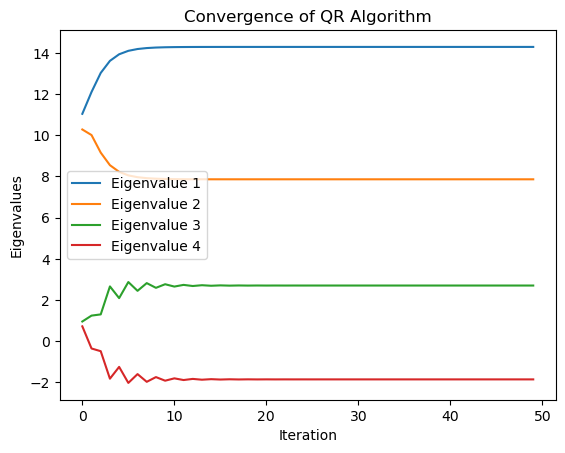

In [33]:
A = np.array([[10,2,3,5],[3,6,8,4],[0,5,4,3],[0,0,4,3]])
# Numpy Eigenvalues
numpy_eigvals, numpy_eigvecs = np.linalg.eig(A)
print("Eigenvalues from numpy:", numpy_eigvals)
# Do 50 iterations of QR algorithm
eigenvals_ls = []
for i in range(50):
    Q,R = np.linalg.qr(A)
    A = R @ Q
    eigenvals_ls.append(np.diag(A))
print("Eigenvalues from QR algorithm after 50 iterations:", np.diag(A))
# Plot convergence
plt.plot([eig[0] for eig in eigenvals_ls], label='Eigenvalue 1')
plt.plot([eig[1] for eig in eigenvals_ls], label='Eigenvalue 2')
plt.plot([eig[2] for eig in eigenvals_ls], label='Eigenvalue 3')
plt.plot([eig[3] for eig in eigenvals_ls], label='Eigenvalue 4')
plt.xlabel("Iteration")
plt.ylabel("Eigenvalues")
plt.title("Convergence of QR Algorithm")
plt.legend()
plt.show()


## QR Methods with Shifs

We consider the calculation of $\lambda_n$ if $(T_k)_{n,n-1} = 0$ we can decouple the system, if this is not the case we have the convergence $(T_k)_{n,n-1} = O(\frac{|\lambda_n|}{|\lambda_{n-1}|}^k)$ which can be really slow if $|\lambda_n| \approx |\lambda_{n-1}|$.

What we can do is to apply the QR-Algorithm to the matrix $A - pI$ with $p \approx \lambda_n$ then we get

$$|\lambda_n - p| << |\lambda_{n-1} - p|$$

**Algorithm**

+ $T_0 = A$
+ For $k = 0,1,2,...$ until convergence do:
+ Choose the shift Parameter $p_{k-1}$
+ $Q_kR_k = T_{k-1} - p_{k-1}I$ (QR decomposition)
+ $T_k = R_k Q_k + p_{k-1}I$

**Shift method 1** We simply choose $p_k = (T_k)_{n,n}$

Eigenvalues from QR algorithm with shift: [14.29731501  7.77575056 -1.77352289  2.70045732]
Eigenvalues from numpy: [14.29731559  7.86325978  2.70045732 -1.86103269]


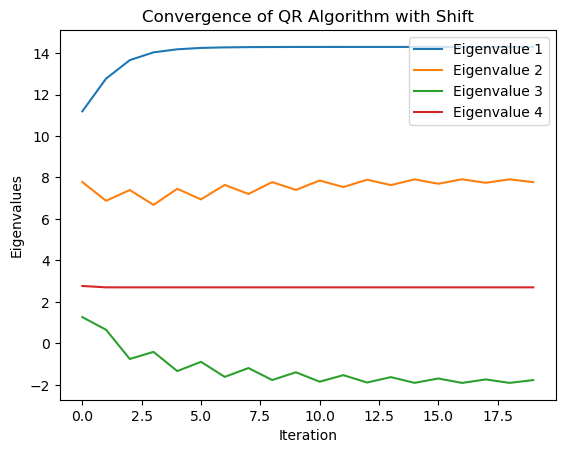

In [37]:
def qr_shift_1(A, max_iter=1000, tol=1e-8):
    """ 
    Implementation of the QR algorithm with single shift to find all eigenvalues of matrix A
    """
    T_k = A.copy()
    eigvals_ls = []
    for i in range(max_iter):
        p = T_k[-1,-1] # Shift
        Q,R = np.linalg.qr(T_k - p * np.eye(A.shape[0]))
        T_k = R @ Q + p * np.eye(A.shape[0])
        # Check for convergence
        off_diag = T_k - np.diag(np.diag(T_k))
        if np.linalg.norm(off_diag, ord='fro') < tol:
            break
        eigvals_ls.append(np.diag(T_k))
    return np.diag(T_k), eigvals_ls

A = np.array([[10,2,3,5],[3,6,8,4],[0,5,4,3],[0,0,4,3]])
eigvals, eigvals_ls = qr_shift_1(A,max_iter=20)
print("Eigenvalues from QR algorithm with shift:", eigvals)
numpy_eigvals, numpy_eigvecs = np.linalg.eig(A)
print("Eigenvalues from numpy:", numpy_eigvals)
plt.plot([eig[0] for eig in eigvals_ls], label='Eigenvalue 1')
plt.plot([eig[1] for eig in eigvals_ls], label='Eigenvalue 2')
plt.plot([eig[2] for eig in eigvals_ls], label='Eigenvalue 3')
plt.plot([eig[3] for eig in eigvals_ls], label='Eigenvalue 4')
plt.xlabel("Iteration")
plt.ylabel("Eigenvalues")
plt.title("Convergence of QR Algorithm with Shift")
plt.legend()
plt.show()

**Shift method 2** We consider the $2 \times 2$ submatrix in the bottom right corner of $T_k$ with eigenvalues $\mu_1, \mu_2$ and choose $p_k$ as the eigenvalue which is closer to $(T_k)_{n,n}$

Eigenvalues from QR algorithm with double shift: [14.29708828  7.86348729  2.70045713 -1.86103269]
Eigenvalues from numpy: [14.29731559  7.86325978  2.70045732 -1.86103269]


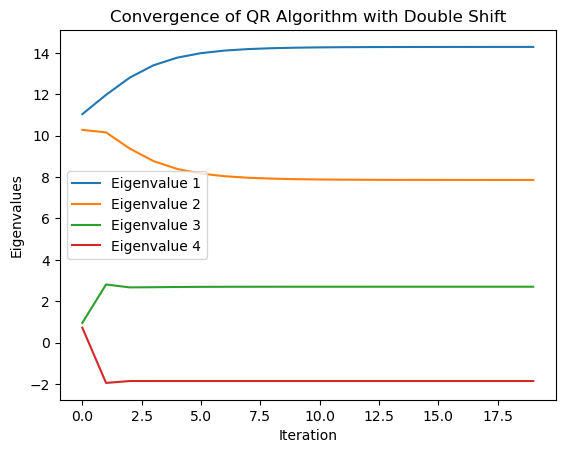

In [38]:
def qr_shift_2(A, max_iter=1000, tol=1e-8):
    """ 
    Implementation of the QR algorithm with double shift to find all eigenvalues of matrix A
    """
    T_k = A.copy()
    eigvals_ls = []
    for i in range(max_iter):
        submatrix = T_k[-2:,-2:]
        mu1, mu2 = np.linalg.eigvals(submatrix)
        # Choose the shift closer to the bottom-right element
        if abs(mu1 - T_k[-1,-1]) < abs(mu2 - T_k[-1,-1]):
            p = mu1
        else:
            p = mu2
        Q,R = np.linalg.qr(T_k - p * np.eye(A.shape[0]))
        T_k = R @ Q + p * np.eye(A.shape[0])
        # Check for convergence
        off_diag = T_k - np.diag(np.diag(T_k))
        if np.linalg.norm(off_diag, ord='fro') < tol:
            break
        eigvals_ls.append(np.diag(T_k))
    return np.diag(T_k), eigvals_ls

A = np.array([[10,2,3,5],[3,6,8,4],[0,5,4,3],[0,0,4,3]])
eigvals, eigvals_ls = qr_shift_2(A,max_iter=20)
print("Eigenvalues from QR algorithm with double shift:", eigvals)
numpy_eigvals, numpy_eigvecs = np.linalg.eig(A)
print("Eigenvalues from numpy:", numpy_eigvals)
plt.plot([eig[0] for eig in eigvals_ls], label='Eigenvalue 1')
plt.plot([eig[1] for eig in eigvals_ls], label='Eigenvalue 2')
plt.plot([eig[2] for eig in eigvals_ls], label='Eigenvalue 3')
plt.plot([eig[3] for eig in eigvals_ls], label='Eigenvalue 4')
plt.xlabel("Iteration")
plt.ylabel("Eigenvalues")
plt.title("Convergence of QR Algorithm with Double Shift")
plt.legend()
plt.show()

# Singular Value Decomposition

The singular value decomposition (SVD) is a decomposition scheme for real or complex $m \times n$ matrices.

**Theorem (SVD)** Let $A$ be a $m \times n$ matrix. Then there exists orthogonal $m \times m$ matrix $U$ and orthogonal $n \times n$ matrix $V$ such that

$$ A = U \Sigma V^*$$

where $\Sigma$ is a $m \times n$ diagonal matrix with non-negative real numbers on the diagonal. The numbers $\sigma_i = \Sigma_{i,i}$ are called the singular values of $A$.

**Theorem (Determining the Pseudoinverse):** For $A a $m \times n$ matrix with SVD $A = U \sigma V^T$ the pseudoinverse $A^+$ can be determined by

$$A^+ = V \frac{1}{\Sigma} U^*$$

where $\frac{1}{\Sigma}$ is the $n \times m$ matrix obtained by transposing $\Sigma$ and replacing each non-zero entry by its reciprocal.